In [126]:
import pandas as pd
df = pd.read_csv("C:\\Users\\acer\\Desktop\\ML projects\\covid19\\covid_19_clean_complete.csv")

In [127]:
df_new=df.rename(columns={ "Country/Region": "country", "Province/State": "state","Confirmed":"confirm","Deaths": "death","Recovered":"recover"})

In [128]:
df_new = df_new.groupby(["country", "Date"])[['confirm', 'death', 'recover']].sum().reset_index()

In [130]:
#sorting top 20 countries by maximum number of cases
df_top20 = df_new.groupby(["country"])[['confirm']].max().reset_index().sort_values(by = ["confirm"],  ascending=False).head(20)


In [131]:
data_top20 = df_new[df_new["country"].isin(df_top20["country"])].sort_values(by = ["country","Date"])

In [132]:
#unique names
data_top20.country.unique()

array(['Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'France',
       'Germany', 'Iran', 'Israel', 'Italy', 'Netherlands', 'Norway',
       'Portugal', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'US', 'United Kingdom'], dtype=object)

In [94]:
data_top20.dtypes

state              object
country            object
Lat               float64
Long              float64
Date       datetime64[ns]
confirm             int64
death               int64
recover             int64
dtype: object

In [90]:
import io
import pandas as pd
import matplotlib.pyplot as plt
fig = px.line(data_top20,
              x='Date', y='confirm', color='country',
              title='top 20')
fig.show()

In [97]:
#Date column is the correct data type, let’s set it as the DataFrame’s index.
df_ts = data_top20.set_index('Date')
df_ts

,state,country,Lat,Long,confirm,death,recover
Date,,,,,,,
2020-01-22,NaN,Austria,47.5162,14.5501,0,0,0
2020-01-23,NaN,Austria,47.5162,14.5501,0,0,0
2020-01-24,NaN,Austria,47.5162,14.5501,0,0,0
2020-01-25,NaN,Austria,47.5162,14.5501,0,0,0
2020-01-26,NaN,Austria,47.5162,14.5501,0,0,0
...,...,...,...,...,...,...,...
2020-04-01,Montserrat,United Kingdom,16.7425,-62.1874,5,0,0
2020-04-01,NaN,United Kingdom,55.3781,-3.4360,29474,2352,135
2020-04-01,Anguilla,United Kingdom,18.2206,-63.0686,2,0,0


In [133]:
data_top20confirm = data_top20[['Date','country', 'confirm']] 
data_top20confirm =data_top20confirm.pivot_table(index='Date',columns='country')


AttributeError: 'Line2D' object has no property 'colors'

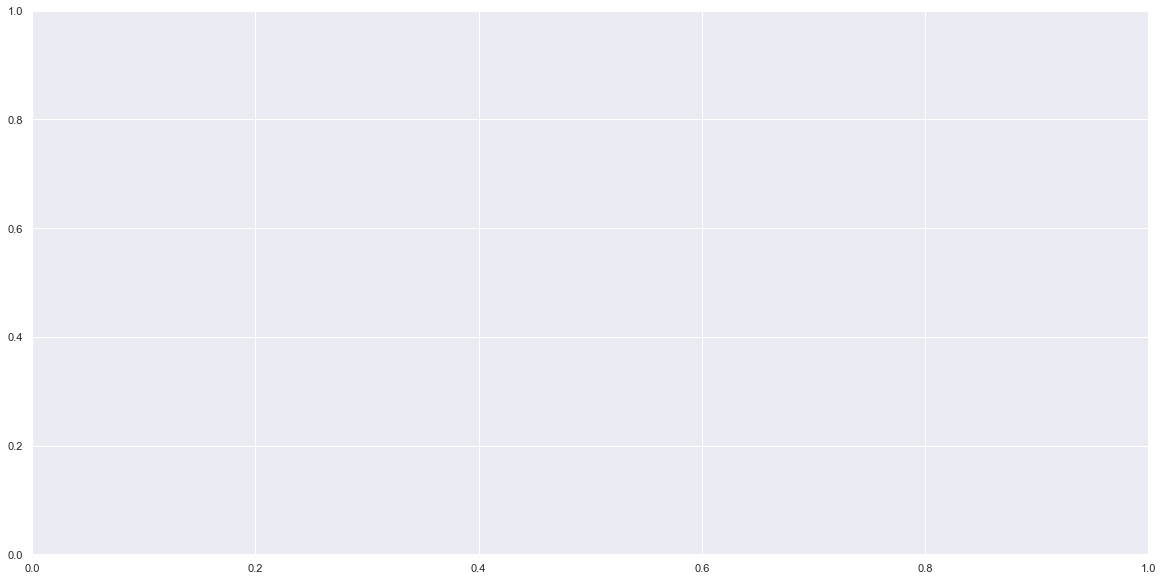

In [136]:
colors = ['red','lime','yellow', 'blue','turquoise', 'green', 'mediumspringgreen', 'magenta', 'coral', 'darkviolet']

data_top20confirm.plot(figsize=(20,10), linewidth=5, fontsize=20, colors = colors)

plt.xlabel('Date', fontsize=20);